In [ ]:
cd("/home/ritaferi/Phd/SSDdev")
using Pkg
Pkg.activate(".")

Pkg.instantiate()


using SolidStateDetectors
using Unitful
using Plots
using Interpolations
using LegendHDF5IO

In [ ]:
#max_tick_distance = 0.5 mm
#mao
#lo commento solo perche ho gia fatto girare la simulazione e mi basta aprirla
sim1 = Simulation(SSD_examples[:InvertedCoax])
sim1.detector = SolidStateDetector(sim1.detector, contact_id=2, contact_potential=500u"V")

calculate_electric_potential!(sim1, 
    #refinement_limits= [0.2, 0.1, 0.05, 0.01],
    refinement_limits= [0.2],
    verbose=false,  # serve per far stamapre o meno tutte le informazioni
    depletion_handling=true,
    grid=Grid(sim1,  max_tick_distance=5u"mm"))

ssd_write("sim1.h5", sim1)

Entro in Grid
stampo cosa sono questi punti importanti: CylindricalPoint{Float32}[CylindricalPoint{Float32}(0.035f0, 8.742278f-8, 0.08f0), CylindricalPoint{Float32}(0.035f0, 1.5707964f0, 0.08f0), CylindricalPoint{Float32}(0.035f0, 3.141593f0, 0.08f0), CylindricalPoint{Float32}(0.035f0, 4.712389f0, 0.08f0), CylindricalPoint{Float32}(0.0f0, 0.0f0, 0.08f0), CylindricalPoint{Float32}(0.035f0, 0.0f0, 0.0f0), CylindricalPoint{Float32}(0.035f0, 1.5707964f0, 0.0f0), CylindricalPoint{Float32}(0.035f0, 3.141593f0, 0.0f0), CylindricalPoint{Float32}(0.035f0, 4.712389f0, 0.0f0), CylindricalPoint{Float32}(0.0f0, 0.0f0, 0.0f0), CylindricalPoint{Float32}(0.035f0, 0.0f0, 0.08f0), CylindricalPoint{Float32}(0.02371f0, 8.742278f-8, 0.08400001f0), CylindricalPoint{Float32}(0.02371f0, 1.5707964f0, 0.08400001f0), CylindricalPoint{Float32}(0.02371f0, 3.141593f0, 0.08400001f0), CylindricalPoint{Float32}(0.02371f0, 4.712389f0, 0.08400001f0), CylindricalPoint{Float32}(0.036f0, 8.742278f-8, 0.08400001f0), Cylindr

┌ Warning: Destination `sim1.h5` already exists. Overwriting...
└ @ SolidStateDetectors.SolidStateDetectorsLegendHDF5IOExt /home/ritaferi/Phd/SolidStateDetectors/SolidStateDetectors.jl/ext/SolidStateDetectorsLegendHDF5IOExt.jl:15


grid = sim1.electric_potential.grid

# collect arrays 
r_points = collect(grid[1])
z_points = collect(grid[3])

# alla combination for r,z
R = repeat(r_points, inner=length(z_points))
Z = repeat(z_points, outer=length(r_points))

scatter(R, Z, markersize=0.5, xlabel="r [mm]", ylabel="z [mm]", title="Grid r-z 0.5 mm",
        xlim=(0, 0.04),
        ylim=(-0.01,0.09) )
plot!(sim1.detector, st = :slice, φ = 0, lw = 1, full_det = false,  legend = false)


In [4]:
using StatsBase: fit, Histogram




# punti esistenti
R_points = R       # o come si chiamano nel tuo namespace
Z_points = Z

# step in metri
d = 0.001   # 0.5 mm

# definisci i bordi dei bin (usando range dinamicamente rispetto ai tuoi dati)
r_edges = minimum(R_points):d:maximum(R_points)
z_edges = minimum(Z_points):d:maximum(Z_points)

# istogramma bidimensionale: conta dei punti in ogni rettangolo
h = fit(Histogram, (R_points, Z_points), (r_edges, z_edges))

# le altezze (matrice dei conteggi)
counts = h.weights

# per il surface servono i centri dei bin
r_centers = (r_edges[1:end-1] .+ r_edges[2:end]) ./ 2
z_centers = (z_edges[1:end-1] .+ z_edges[2:end]) ./ 2

heatmap(
    r_centers, z_centers, counts',
    xlabel="r [m]", ylabel="z [m]",
    title="grid (0.5 mm)",
    colorbar_title="count",
    xlim=(0, 0.04),
    ylim=(-0.01,0.09),
    c = :viridis
)
plot!(sim1.detector, st = :slice, φ = 0, lw = 1, full_det = false,  legend = false)

-------------------------------------------------------

In [ ]:
#max_tick_distance = 0.1 mm
sim2 = Simulation(SSD_examples[:InvertedCoax])
sim2.detector = SolidStateDetector(sim2.detector, contact_id=2, contact_potential=500u"V")
calculate_electric_potential!(sim2,
    refinement_limits= [0.2, 0.1, 0.05, 0.01],
    verbose=false,
    depletion_handling=true,
    max_distance_ratio = 1,
    grid=Grid(sim2, max_tick_distance=0.1u"mm"))
ssd_write("sim2.h5", sim2)

Entro in Grid
stampo cosa sono questi punti importanti: CylindricalPoint{Float32}[CylindricalPoint{Float32}(0.035f0, 8.742278f-8, 0.08f0), CylindricalPoint{Float32}(0.035f0, 1.5707964f0, 0.08f0), CylindricalPoint{Float32}(0.035f0, 3.141593f0, 0.08f0), CylindricalPoint{Float32}(0.035f0, 4.712389f0, 0.08f0), CylindricalPoint{Float32}(0.0f0, 0.0f0, 0.08f0), CylindricalPoint{Float32}(0.035f0, 0.0f0, 0.0f0), CylindricalPoint{Float32}(0.035f0, 1.5707964f0, 0.0f0), CylindricalPoint{Float32}(0.035f0, 3.141593f0, 0.0f0), CylindricalPoint{Float32}(0.035f0, 4.712389f0, 0.0f0), CylindricalPoint{Float32}(0.0f0, 0.0f0, 0.0f0), CylindricalPoint{Float32}(0.035f0, 0.0f0, 0.08f0), CylindricalPoint{Float32}(0.02371f0, 8.742278f-8, 0.08400001f0), CylindricalPoint{Float32}(0.02371f0, 1.5707964f0, 0.08400001f0), CylindricalPoint{Float32}(0.02371f0, 3.141593f0, 0.08400001f0), CylindricalPoint{Float32}(0.02371f0, 4.712389f0, 0.08400001f0), CylindricalPoint{Float32}(0.036f0, 8.742278f-8, 0.08400001f0), Cylindr

┌ Warning: Detector seems not to be not fully depleted at a bias voltage of 500.0 V.
│ At least one grid point has a higher potential value (500.00003 V)
│ than the maximum applied potential (500.0 V). This should not be.
│ However, small overshoots could be due to numerical precision.
└ @ SolidStateDetectors /home/ritaferi/Phd/SolidStateDetectors/SolidStateDetectors.jl/src/Simulation/Simulation.jl:1048
┌ Warning: Destination `sim2.h5` already exists. Overwriting...
└ @ SolidStateDetectors.SolidStateDetectorsLegendHDF5IOExt /home/ritaferi/Phd/SolidStateDetectors/SolidStateDetectors.jl/ext/SolidStateDetectorsLegendHDF5IOExt.jl:15


grid = sim2.electric_potential.grid

# collect arrays 
r_points = collect(grid[1])
z_points = collect(grid[3])

# alla combination for r,z
R = repeat(r_points, inner=length(z_points))
Z = repeat(z_points, outer=length(r_points))

scatter(R, Z, markersize=0.5, xlabel="r [mm]", ylabel="z [mm]", title="Grid r-z 0.1 mm",
        xlim=(0, 0.04),
        ylim=(-0.01,0.09) )
plot!(sim1.detector, st = :slice, φ = 0, lw = 1, full_det = false,  legend = false)



R_points = R       # o come si chiamano nel tuo namespace
Z_points = Z

# step in metri
d = 0.001  # 0.5 mm

# definisci i bordi dei bin (usando range dinamicamente rispetto ai tuoi dati)
r_edges = minimum(R_points):d:maximum(R_points)
z_edges = minimum(Z_points):d:maximum(Z_points)

# istogramma bidimensionale: conta dei punti in ogni rettangolo
h = fit(Histogram, (R_points, Z_points), (r_edges, z_edges))

# le altezze (matrice dei conteggi)
counts = h.weights

# per il surface servono i centri dei bin
r_centers = (r_edges[1:end-1] .+ r_edges[2:end]) ./ 2
z_centers = (z_edges[1:end-1] .+ z_edges[2:end]) ./ 2

heatmap(
    r_centers, z_centers, counts',
    xlabel="r [m]", ylabel="z [m]",
    title="grid (0.1 mm)",
    colorbar_title="count",
    xlim=(0, 0.04),
    ylim=(-0.01,0.09),
    c = :viridis
)
plot!(sim1.detector, st = :slice, φ = 0, lw = 1, full_det = false,  legend = false)

---------------------

In [45]:
#sim2 = ssd_read("sim2.h5", Simulation)

axes = [:r, :z]

plots_array = []

for (j, i) in enumerate([1,3])
    diffs1 = 1000 * diff(sim1.electric_potential.grid[i])
    diffs2 = 1000 * diff(sim2.electric_potential.grid[i])
    
    p1 = plot(diffs1,
              xlabel="Grid points",
              ylabel="Δ$(axes[j]) [mm]",
              title="Grid max tick = 0.5 mm", 
              legend=false)
    
    p2 = plot(diffs2,
              xlabel="Grid points",
              ylabel="Δ$(axes[j]) [mm]",
              title="Grid max tick = 0.1 mm",
              legend=false)
    
    push!(plots_array, p1, p2)
end

plot(plots_array..., layout=(2,2), size=(800,600))


In [32]:
# sono tutti SSD object

r1 = (sim1.electric_potential.grid[1]) # radial axes (big grid)
φ1 = (sim1.electric_potential.grid[2]) # phi axes
z1 = (sim1.electric_potential.grid[3]) # z axes

r2 = (sim2.electric_potential.grid[1]) # radial axes (big grid)
φ2 = (sim2.electric_potential.grid[2]) # phi axes
z2 = (sim2.electric_potential.grid[3]) # z axes

-0.01 .. 0.09 - length = 110

In [34]:
# phi symmetry
V1_slice = sim1.electric_potential.data[:, 1, :] ; # all r, φ=0, all z
V2_slice = sim2.electric_potential.data[:, 1, :] ;
V1_slice = Float64.(V1_slice)
V2_slice = Float64.(V2_slice)
# la dimensione di V1 dipende dalla dimensione di r = 44 e z = 52
# la dimensione di V2 dipende dalla dimensione di r = 68 e z = 116

54×110 Matrix{Float64}:
 298.66   274.696  249.906  223.993  …  389.014  374.633  360.346  346.228
 298.733  274.814  250.067  224.19      389.013  374.619  360.323  346.195
 298.951  275.171  250.554  224.786     389.01   374.578  360.251  346.097
 299.313  275.769  251.374  225.795     388.999  374.506  360.131  345.934
 299.818  276.615  252.543  227.242     388.97   374.398  359.959  345.706
 300.232  277.321  253.527  228.468  …  388.935  374.303  359.814  345.516
 300.707  278.143  254.682  229.915     388.885  374.186  359.643  345.297
 301.241  279.084  256.013  231.595     388.814  374.047  359.446  345.048
 301.833  280.146  257.53   233.523     388.721  373.883  359.222  344.77
 303.041  282.371  260.747  237.653     388.488  373.521  358.748  344.192
   ⋮                                 ⋱                             
 315.153  327.358  339.891  352.889  …  293.021  286.243  279.51   272.847
 313.952  325.739  337.836  350.369     290.47   283.956  277.483  271.077
 312.718 

In [5]:
minimum(r1.interval)
# mao

UndefVarError: UndefVarError: `r1` not defined in `Main`
Suggestion: check for spelling errors or missing imports.

In [36]:
# r1_arr e z1_arr definiscono i punti di griglia in coordinate r e z per la matrice V1_slice.

r1_arr =  Float64.(collect(range(minimum(r1.interval), stop=maximum(r1.interval), length = length(V1_slice[:,1]) )));
z1_arr =  Float64.(collect(range(minimum(z1.interval), stop=maximum(z1.interval), length = length(V1_slice[1,:]) )));


r2_arr =  Float64.(collect(range(minimum(r2.interval), stop= maximum(r2.interval), length = length(V2_slice[: ,1]) )));
z2_arr =  Float64.(collect(range(minimum(z2.interval), stop=maximum(z2.interval), length = length(V2_slice[1,:]) )));


In [39]:
itp1 = interpolate(Float64.(V1_slice), BSpline(Linear()), OnGrid());
"""
interpolate crea un interpolante B-spline lineare sulla griglia di V1_slice.

BSpline(Linear()) → interpolazione lineare tra i punti della griglia.

OnGrid() → indica che la griglia di input è regolare e corrisponde agli indici della matrice.

In pratica: itp1 è una funzione che può restituire valori interpolati di V1_slice per coordinate intermedie 
tra i punti della griglia originale.
"""


"interpolate crea un interpolante B-spline lineare sulla griglia di V1_slice.\n\nBSpline(Linear()) → interpolazione lineare tra i punti della griglia.\n\nOnGrid() → indica che la griglia di input è regolare e corrisponde agli indici della matrice.\n\nIn pratica: itp1 è una funzione che può restituire valori interpolati di V1_slice per coordinate intermedie \ntra i punti della griglia originale.\n"

In [40]:
r1_range = range(minimum(r1.interval), stop=maximum(r1.interval), length=size(V1_slice, 1))
z1_range = range(minimum(z1.interval), stop=maximum(z1.interval), length=size(V1_slice, 2))

r2_range = range(minimum(r2.interval), stop=maximum(r2.interval), length=size(V2_slice, 1))
z2_range = range(minimum(z2.interval), stop=maximum(z2.interval), length=size(V2_slice, 2))


itp1_scaled = scale(itp1, r1_range, z1_range);
# FALLO RIGIRARE



24×32 scale(interpolate(::Matrix{Float64}, BSpline(Linear())), (0.0f0:0.0017391305f0:0.04f0, -0.01f0:0.0032258064f0:0.09f0)) with element type Float64:
 302.332  174.353    3.44631   …  459.89   433.649  390.755  348.083
 302.634  175.339    3.43209      460.616  433.914  390.741  347.953
 303.538  178.398    3.18391      462.742  434.626  390.672  347.563
 303.969  179.969    2.52724      463.683  434.891  390.617  347.375
 304.465  181.839    0.916648     464.704  435.154  390.542  347.157
 305.024  184.049    0.616869  …  465.742  435.395  390.444  346.909
 305.646  186.63     0.789185     466.703  435.594  390.319  346.632
 313.993  227.241   27.8063       467.281  435.036  387.941  342.789
 325.325  327.593  266.631        465.692  431.919  382.937  336.37
 326.397  339.73   367.227        465.394  431.378  382.172  335.489
   ⋮                           ⋱                      ⋮      
 336.657  410.858  498.232     …  441.693  401.747  353.564  311.07
 335.869  411.281  498.241   

In [41]:
V1_on_fine_grid = [itp1_scaled(r2_arr[i], z2_arr[j]) for i in 1:length(r2_arr), j in 1:length(z2_arr)];


In [42]:
V_diff = (V2_slice - V1_on_fine_grid) ; # normalizzo rispetto al potenziale di bias

In [43]:
gr()

Plots.GRBackend()

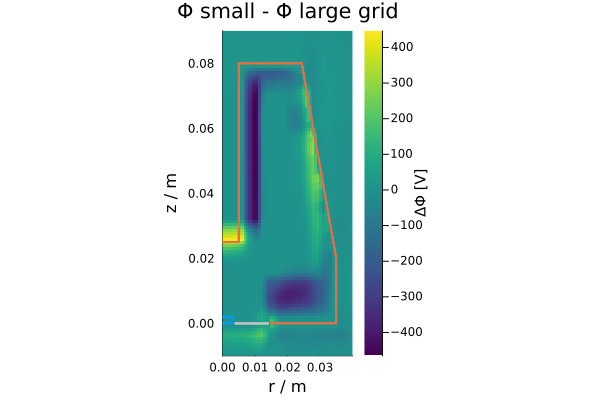

In [44]:
heatmap(
    r2_arr,        # o r2[i].lo se non hai ancora trasformato in array
    z2_arr,        # z2[i].lo
    V_diff',
    xlabel="r [mm]",
    ylabel="z [mm]",
    colorbar_title="ΔΦ [V]",
    title="Φ small - Φ large grid",
    color=:viridis
)
plot!(sim2.detector, st = :slice, φ = 0, lw = 1, full_det = false,  legend = false)
plot!(xlim = (minimum(r2_arr), maximum(r2_arr)), ylim = (minimum(z2_arr), maximum(z2_arr)))

In [45]:
# Intervallo di interesse
V_diff_rel = 100*abs.(V_diff)/500 # normalizzo per il bias
V_min = 10 
V_max = maximum(V_diff_rel)

# Trova tutti gli indici dove la differenza rientra nell'intervallo
inds = findall(x -> V_min <= x <= V_max, V_diff_rel)

# Converti in coordinate fisiche r, z
coords = [(r2_arr[Tuple(i)[1]], z2_arr[Tuple(i)[2]]) for i in inds]

# Mostra le prime 10 coppie per esempio
println("Numero di punti trovati: ", length(coords))
println("Prime 10 coppie r,z:")
println(coords[1:min(10, end)])


Numero di punti trovati: 1587
Prime 10 coppie r,z:
[(0.009056603536009789, -0.007247706409543753), (0.009811320342123508, -0.007247706409543753), (0.010566038079559803, -0.007247706409543753), (0.011320754885673523, -0.007247706409543753), (0.012075471691787243, -0.007247706409543753), (0.0060377358458936214, -0.006330275442451239), (0.006792452652007341, -0.006330275442451239), (0.007547169923782349, -0.006330275442451239), (0.008301886729896069, -0.006330275442451239), (0.009056603536009789, -0.006330275442451239)]


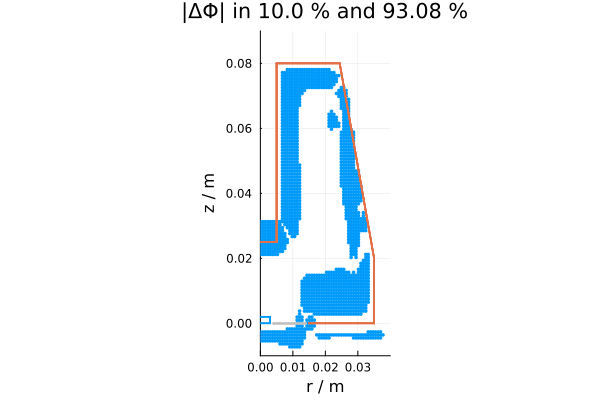

In [46]:
r_pts = [p[1] for p in coords]
z_pts = [p[2] for p in coords]

scatter(r_pts, z_pts,
    xlabel="r [mm]",
    ylabel="z [mm]",
    title = "|ΔΦ| in $(round(V_min, digits=2)) % and $(round(V_max, digits=2)) %",
    ms=2,
    markerstrokewidth=0,
    legend=false)

plot!(sim1.detector, st = :slice, φ = 0, lw = 1, full_det = false,  legend = false)
plot!(xlim = (minimum(r2_arr), maximum(r2_arr)), ylim = (minimum(z2_arr), maximum(z2_arr)))

--------------------